# Indian Sign Language Classfication with Convolutional Neural Networks

***

<span style= "color:red;">Note: The dataset i used in this project mostly consist of duplicates of a single image belonging to each class. </span>

## Importing necessary libraries

This Python code imports several libraries for a sign language classification project using convolutional neural networks. Here's a brief description of each library and module:


* numpy is imported as np. This library is used for numerical operations in Python.
* seaborn is imported as sns. This library is used for data visualization.
* matplotlib.pyplot is imported as plt. This module provides a collection of functions for creating plots.
* glob and os are imported for file handling operations.
* skimage.transform is imported to resize images.
* sklearn.utils is imported to shuffle data.
* sklearn.model_selection is imported to split the data into training and testing sets.
* tensorflow.keras is imported as keras. This module provides a high-level neural networks API for training and evaluating deep learning models.
* sklearn.metrics is imported to calculate the accuracy score, classification report, and confusion matrix for the model.

This code is just importing libraries and modules and does not contain any implementation details of the sign language classification project.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow import keras
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import cv2

## Loading the dataset

This Python code reads image files from a directory named "Sign languages".

The os.listdir() function is used to list all the files and directories in the specified path, which in this case is "Sign languages/". The for loop iterates over each file in the directory using os.listdir().

The glob.glob() function is then used to find all the image files in each subdirectory of the "Sign languages/" directory. The subdirectories are identified by file, which is the loop variable that iterates over the directories in the main directory. The * wildcard character is used to match all files with the ".jpg" extension in each subdirectory.

The globals() function is used to create a new global variable for each subdirectory with the prefix "folder_". The name of each new variable is based on the name of the subdirectory, which is stored in file.

Overall, this code is used to read and store the file paths of all image files in the "Sign languages/" directory and its subdirectories as global variables with specific prefixes for each subdirectory.

In [3]:
for file in os.listdir('Sign languages/'):
    globals() [f"folder_{file}"] = glob.glob(f'Sign languages/{file}/*.jpg')

## Reading the images

This Python code creates a dictionary called label_names to store the labels for the image data in the sign language classification project.

The os.listdir() function is used to list all the directories in the specified path, which in this case is "Sign languages/". The enumerate() function is then used to create a sequence of (index, value) pairs for each directory in the list.

The dict() function is used to convert this sequence into a dictionary, where the index values represent the label names and the directory names represent the keys.

Therefore, label_names is a dictionary with numeric labels for each of the sign language classes. The keys in the label_names dictionary are the names of the subdirectories in the "Sign languages/" directory, and the values are the corresponding numerical labels.

In [4]:
label_names = dict(enumerate(os.listdir('Sign languages/')))

In [5]:
label_names

{0: '1',
 1: '2',
 2: '3',
 3: '4',
 4: '5',
 5: '6',
 6: '7',
 7: '8',
 8: '9',
 9: 'A',
 10: 'B',
 11: 'C',
 12: 'D',
 13: 'E',
 14: 'F',
 15: 'G',
 16: 'H',
 17: 'I',
 18: 'J',
 19: 'K',
 20: 'L',
 21: 'M',
 22: 'N',
 23: 'O',
 24: 'P',
 25: 'Q',
 26: 'R',
 27: 'S',
 28: 'T',
 29: 'U',
 30: 'V',
 31: 'W',
 32: 'X',
 33: 'Y',
 34: 'Z'}

This Python code loads the image files from the subdirectories of the "Sign languages/" directory and stores them in two lists: image and label.

The code uses a for loop to iterate over each subdirectory in the "Sign languages/" directory. For each subdirectory, the loop iterates over each image file in the directory using the eval() function to dynamically evaluate the variable name for the current subdirectory.

For each image file, the plt.imread() function is used to read the image and store it as an array in the image list. The numerical label for the current subdirectory is also stored in the label list.

The count variable is used to keep track of the numerical label for each subdirectory. It starts at 0 and increments by 1 after each subdirectory has been processed.

After this code is executed, image and label will contain all the image data and corresponding labels, respectively, for the sign language classification project.

In [5]:
image = []
label = []

count = 0
for folder in os.listdir('Sign languages/'):
    for i in eval(f"folder_{folder}"):
        img = plt.imread(i)
        image.append(img)
        label.append(count)
    count += 1

## Plotting the images

This Python code generates a visual representation of the first 15 images from the image list and their corresponding labels from the label list.

The plt.figure() function is used to create a new figure with a size of 10x8 inches.

The for loop iterates over the first 15 elements of image and label. For each element, the plt.subplot() function is used to create a grid of subplots with 3 rows and 5 columns. The i+1 argument is used to set the position of the current subplot within the grid.

The plt.imshow() function is used to display the current image, which is accessed using the index i in the image list. The plt.title() function is used to display the label for the current image, which is accessed using the index i in the label list and converted to its corresponding string value using the label_names dictionary.

Finally, the plt.tight_layout() function is used to improve the spacing between subplots for better visual clarity.

This code is used to visually inspect a sample of the image data and their corresponding labels to ensure that the data has been correctly loaded and labeled.

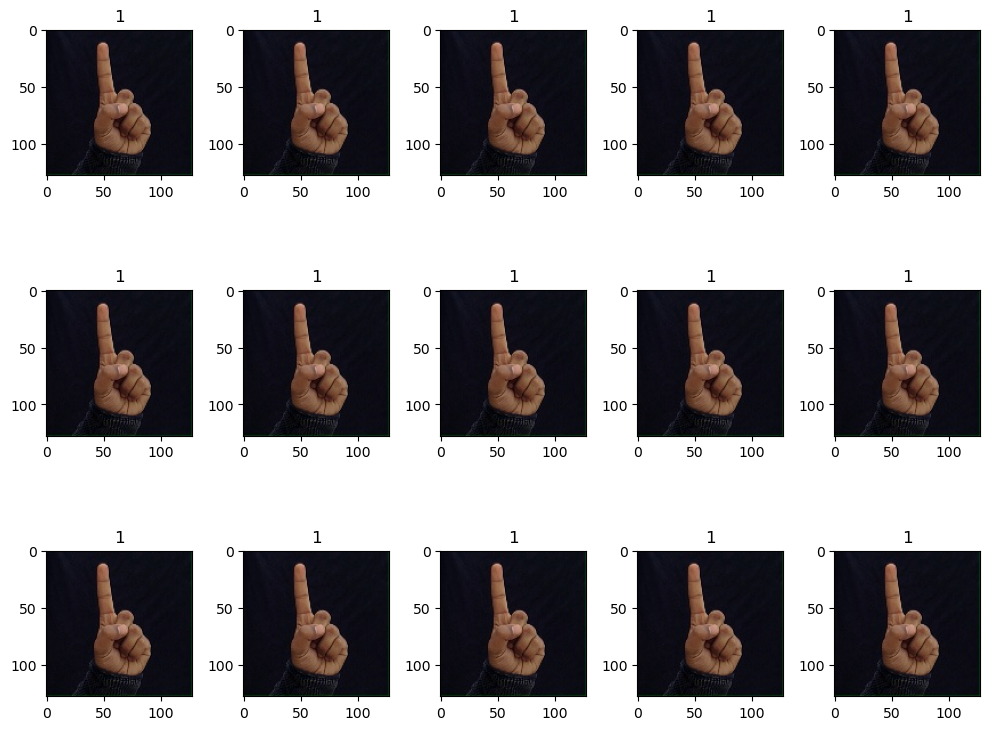

In [6]:
plt.figure(figsize = (10,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(image[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

## Shuffling of images

This Python code shuffles the image and label lists randomly.

The shuffle() function is called from the sklearn.utils library, which is used to randomly shuffle the elements in the image and label lists. This is useful for ensuring that the data is randomly distributed across the training and testing sets during model training.

After this code is executed, the image and label lists will be randomly reordered.

In [7]:
image,label=shuffle(image,label)

This Python code generates a new visual representation of the first 15 images from the image list and their corresponding labels from the label list, after shuffling the data.

The code is identical to the previous visual representation generated using plt.subplot(), except that the image and label lists have been shuffled randomly. This means that the order of the images and their corresponding labels will be different from the previous representation.

The purpose of this code is to visually inspect a sample of the image data and their corresponding labels after shuffling, to ensure that the data has been shuffled correctly.

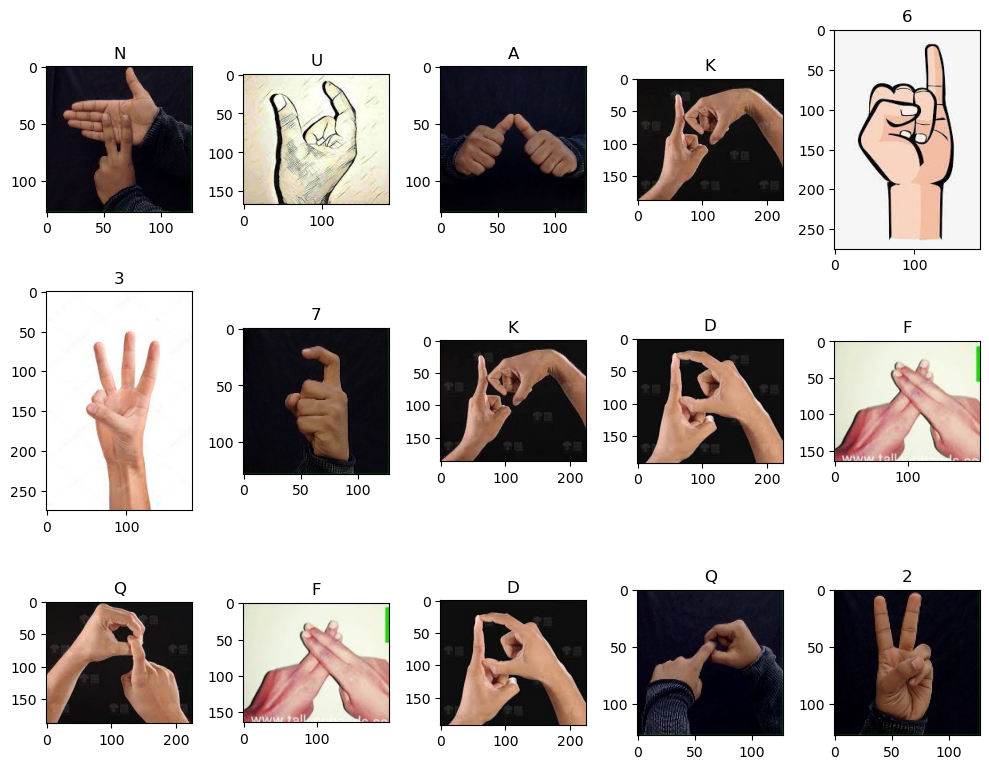

In [8]:
plt.figure(figsize = (10,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(image[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

## Resizing images

This Python code resizes the images in the image list to a uniform size of 64x64 pixels with 3 color channels (RGB). The resized images are stored in a new list called x.

The code uses a for loop to iterate over each image in the image list. For each image, the resize() function from the skimage.transform library is used to resize the image to the specified size of 64x64 pixels with 3 color channels. The resized image is then appended to the x list.

After this code is executed, x will contain all the resized images, which can be used for training a convolutional neural network (CNN) model for the sign language classification task.

In [9]:
x=[]
for i in image:
    x.append(resize(i,(64,64,3)))

This Python code generates a new visual representation of the first 15 images from the x list, which contains the resized images, and their corresponding labels from the label list.

The code is similar to the previous visual representations generated using plt.subplot(), except that the x list contains the resized images. The plt.imshow() function is used to display the current resized image, which is accessed using the index i in the x list. The plt.title() function is used to display the label for the current image, which is accessed using the index i in the label list and converted to its corresponding string value using the label_names dictionary.

The purpose of this code is to visually inspect a sample of the resized image data and their corresponding labels to ensure that the resizing process has been correctly applied to the data.

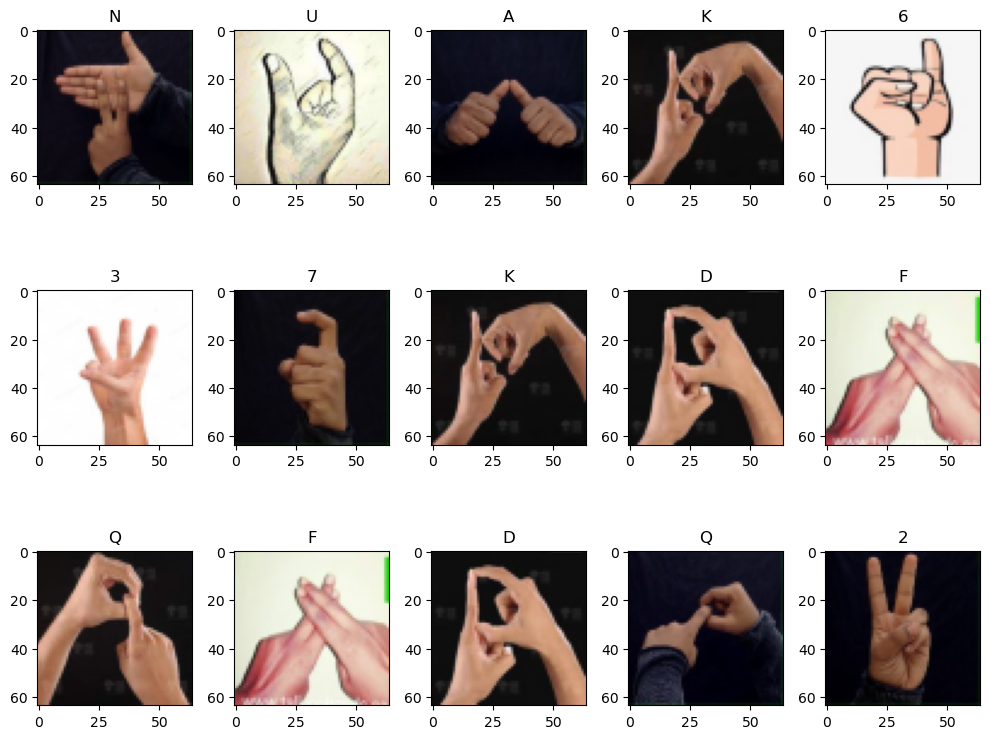

In [10]:
plt.figure(figsize = (10,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

### Convert the images and labels to numpy arrays

This Python code converts the x list and label list into NumPy arrays.

The np.array() function is used to convert the x list into a NumPy array, which is then assigned to the variable x. Similarly, the np.array() function is used to convert the label list into a NumPy array, which is then assigned to the variable y.

This step is typically necessary for training a machine learning model, such as a convolutional neural network (CNN), as most machine learning libraries require the input data to be in the form of NumPy arrays. Additionally, NumPy arrays offer various performance benefits over Python lists when performing mathematical operations, making them a preferred choice for machine learning tasks.

In [11]:
x=np.array(x)
y=np.array(label)

## Train test splitting of data

This Python code splits the x array and y array into training and testing sets using the train_test_split() function from the scikit-learn library.

The train_test_split() function randomly splits the input data into training and testing sets. The x array is split into x_train (training data) and x_test (testing data), while the y array is split into y_train (training labels) and y_test (testing labels). The test_size parameter is set to 0.2, which means that 20% of the input data will be used for testing and the remaining 80% will be used for training.

This step is necessary for evaluating the performance of a machine learning model, such as a convolutional neural network (CNN), on previously unseen data. The testing set is used to measure the accuracy of the model on new, unseen data, while the training set is used to optimize the model's parameters to improve its performance.

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Model building using CNN

This Python code defines a convolutional neural network (CNN) model using the Keras API provided by the TensorFlow library.

The Sequential() function is used to initialize a linear stack of layers for the model. The layers are then added to the model using the add() method.

The model consists of the following layers:

Conv2D layer with 32 filters of size (3,3) and a rectified linear unit (ReLU) activation function. The input_shape parameter is set to (64,64,3) to match the size of the input images.
MaxPool2D layer to reduce the spatial dimensions of the output of the previous Conv2D layer.
Another Conv2D layer with 32 filters of size (3,3) and a ReLU activation function.
Another MaxPool2D layer to reduce the spatial dimensions of the output of the previous Conv2D layer.
Flatten layer to flatten the output of the previous MaxPool2D layer.
Dense layer with 128 neurons and a ReLU activation function.
Dense layer with 35 neurons and a sigmoid activation function, which is used for multi-class classification with one-hot encoded labels.
This model architecture is a common choice for image classification tasks and is often referred to as a "vanilla" CNN architecture. The purpose of this code is to define the model architecture that will be used to train and test the sign language classification model.

In [13]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(35,activation='sigmoid')
])

This Python code compiles the previously defined CNN model using the compile() method in Keras.

The compile() method configures the model for training by specifying the optimizer, loss function, and performance metric.

In this case, the optimizer is set to 'adam', which is a popular gradient descent optimization algorithm that adapts learning rates based on the momentum of the gradients.

The loss function is set to 'sparse_categorical_crossentropy', which is commonly used for multi-class classification problems and is suitable when the labels are integers (not one-hot encoded).

The performance metric is set to 'accuracy', which is used to measure the accuracy of the model during training and evaluation.

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

This Python code prints a summary of the CNN model using the summary() method in Keras.

The summary() method provides a table that lists the layers in the model, the output shape of each layer, and the number of trainable parameters in the model.

The output includes the following columns:

Layer - the name of each layer in the model
Output Shape - the shape of the output tensor of each layer
Param # - the number of trainable parameters in each layer
The summary shows that the model has two Conv2D layers with 32 filters each, two MaxPool2D layers to downsample the feature maps, and two fully connected Dense layers. The output shape of each layer is shown in the second column, and the number of trainable parameters in each layer is shown in the third column. The last line shows the total number of trainable parameters in the model, which is 122,979.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

## Model Training 

This Python code trains the previously defined CNN model using the fit() method in Keras.

The fit() method trains the model for a fixed number of epochs (specified by the epochs parameter) using the specified training data (x_train and y_train).

The validation_split parameter specifies the fraction of the training data to use for validation during training. In this case, 10% of the training data is used for validation.

During training, the model will attempt to minimize the loss function (sparse_categorical_crossentropy) and maximize the performance metric (accuracy).

In [15]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
160/160 [==============================] - 32s 153ms/step - loss: 0.5856 - accuracy: 0.8666 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/10
160/160 [==============================] - 24s 147ms/step - loss: 6.2868e-04 - accuracy: 1.0000 - val_loss: 3.9745e-04 - val_accuracy: 1.0000
Epoch 3/10
160/160 [==============================] - 26s 164ms/step - loss: 2.8276e-04 - accuracy: 1.0000 - val_loss: 2.1580e-04 - val_accuracy: 1.0000
Epoch 4/10
160/160 [==============================] - 26s 160ms/step - loss: 1.6711e-04 - accuracy: 1.0000 - val_loss: 1.3740e-04 - val_accuracy: 1.0000
Epoch 5/10
160/160 [==============================] - 24s 147ms/step - loss: 1.1187e-04 - accuracy: 1.0000 - val_loss: 9.5847e-05 - val_accuracy: 1.0000
Epoch 6/10
160/160 [==============================] - 23s 147ms/step - loss: 7.9990e-05 - accuracy: 1.0000 - val_loss: 7.0426e-05 - val_accuracy: 1.0000
Epoch 7/10
160/160 [==============================] - 23s 143ms/step - loss: 5.9676e-05 - 

This Python code evaluates the previously defined CNN model on the training data using the evaluate() method in Keras.

The evaluate() method calculates the value of the loss function and the performance metric (in this case, accuracy) for the specified data (x_train and y_train).

The output of the evaluate() method is a list of two values: the loss value and the accuracy value. These values indicate how well the model is performing on the training data.

In [16]:
model.evaluate(x_train,y_train)

177/177 [==============================] - 7s 40ms/step - loss: 2.6844e-05 - accuracy: 1.0000


[2.684449100343045e-05, 1.0]

## Model prediction

This Python code generates predictions on the test data using the previously defined CNN model.

The predict() method in Keras is used to generate predictions from the model for the specified input data (x_test). The output of the predict() method is an array of predictions for each input in x_test.

The predictions in this case will be probabilities, since the output layer of the model has a sigmoid activation function.

In [17]:
pred=model.predict(x_test)

45/45 [==============================] - 7s 38ms/step


This Python code converts the predicted probabilities generated in the previous step into class labels.

Since the model's output layer uses a sigmoid activation function, the predicted probabilities for each input are in the range [0, 1]. To convert these probabilities to class labels, we select the class with the highest probability for each input using the argmax() method in NumPy.

The resulting pred_val list contains the predicted class labels for each input in x_test.

In [18]:
pred_val=[np.argmax(i) for i in pred]

In [19]:
pred_val

[7,
 33,
 32,
 18,
 19,
 20,
 34,
 13,
 13,
 19,
 4,
 16,
 30,
 25,
 28,
 14,
 24,
 26,
 2,
 29,
 32,
 14,
 30,
 34,
 33,
 3,
 33,
 26,
 5,
 6,
 7,
 20,
 29,
 19,
 30,
 11,
 6,
 0,
 34,
 6,
 26,
 3,
 2,
 15,
 25,
 19,
 24,
 26,
 9,
 24,
 14,
 27,
 30,
 16,
 18,
 5,
 9,
 25,
 21,
 27,
 28,
 5,
 13,
 14,
 16,
 25,
 14,
 26,
 29,
 21,
 30,
 17,
 24,
 18,
 34,
 21,
 7,
 8,
 11,
 9,
 2,
 33,
 17,
 6,
 7,
 17,
 12,
 31,
 31,
 16,
 12,
 28,
 13,
 23,
 28,
 31,
 10,
 27,
 8,
 23,
 13,
 31,
 26,
 23,
 11,
 25,
 5,
 5,
 11,
 27,
 28,
 19,
 34,
 5,
 2,
 25,
 10,
 21,
 12,
 29,
 25,
 34,
 33,
 19,
 24,
 18,
 20,
 5,
 21,
 3,
 9,
 8,
 5,
 28,
 11,
 6,
 29,
 5,
 4,
 31,
 3,
 12,
 4,
 11,
 7,
 32,
 0,
 8,
 24,
 29,
 2,
 20,
 3,
 0,
 32,
 22,
 16,
 28,
 19,
 25,
 20,
 18,
 9,
 29,
 20,
 1,
 15,
 12,
 26,
 33,
 16,
 7,
 5,
 13,
 4,
 23,
 4,
 16,
 32,
 5,
 8,
 27,
 9,
 30,
 19,
 13,
 10,
 6,
 33,
 15,
 4,
 31,
 24,
 26,
 13,
 34,
 3,
 23,
 23,
 31,
 0,
 30,
 1,
 1,
 20,
 34,
 34,
 9,
 8,
 21,
 29,
 13,


## Model evaluation using different metrics

### Accuracy score

This Python code calculates the accuracy of the model's predictions on the test data using the accuracy_score() function from the scikit-learn library.

The accuracy_score() function takes two arrays of labels (in this case, the true labels y_test and the predicted labels pred_val) and returns the accuracy of the model's predictions as a single float value.

The accuracy score is calculated as the proportion of correctly classified inputs in x_test, i.e., the number of inputs for which the true label equals the predicted label divided by the total number of inputs in x_test.

In [20]:
accuracy_score(y_test,pred_val)

1.0

### Confusion matrix

This Python code generates a heatmap of the confusion matrix for the model's predictions on the test data using the confusion_matrix() function from scikit-learn and the heatmap() function from the seaborn library.

The confusion_matrix() function takes two arrays of labels (in this case, the true labels y_test and the predicted labels pred_val) and returns a confusion matrix, which is a table that summarizes the number of true positives, false positives, true negatives, and false negatives for each class.

The resulting confusion matrix is then visualized using the heatmap() function from seaborn. The heatmap shows the number of inputs that were classified correctly (on the diagonal) and the number of inputs that were misclassified (off the diagonal) for each class. The color scale indicates the number of inputs in each cell of the heatmap.

Text(120.72222222222221, 0.5, 'Actual Values')

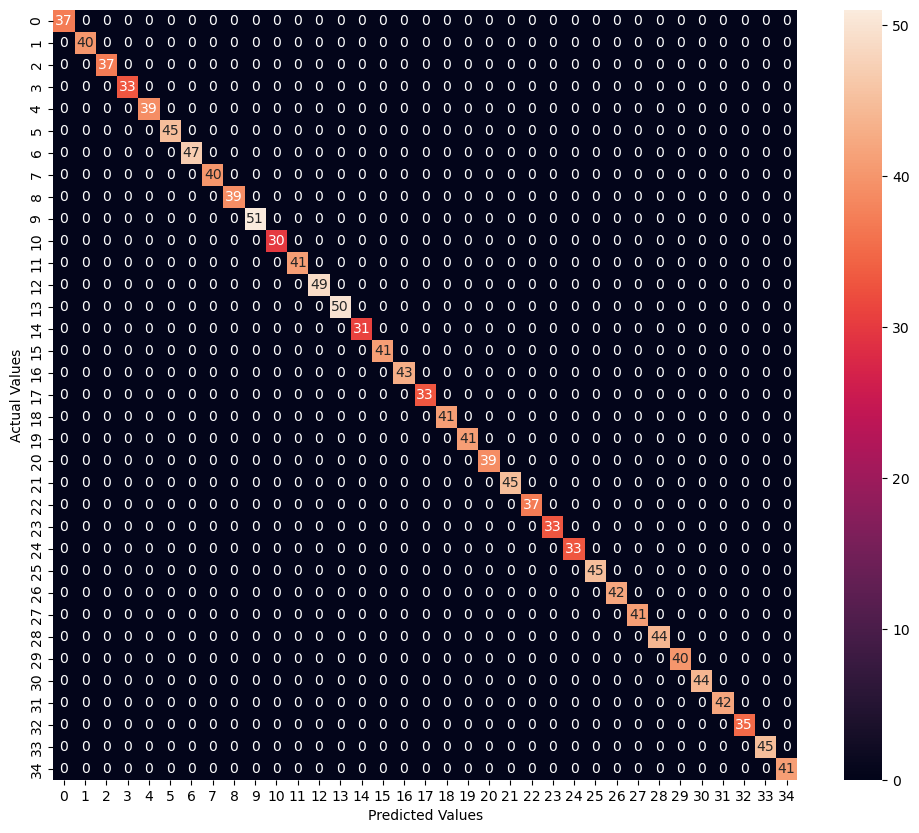

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test,pred_val),annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

### Classification report

This Python code prints a classification report for the model's predictions on the test data using the classification_report() function from scikit-learn.

The classification_report() function takes two arrays of labels (in this case, the true labels y_test and the predicted labels pred_val) and returns a report that includes several metrics for each class, including precision, recall, F1 score, and support.

Precision is the proportion of true positives among all positives (i.e., the number of true positives divided by the sum of true positives and false positives). Recall is the proportion of true positives among all actual positives (i.e., the number of true positives divided by the sum of true positives and false negatives). F1 score is the harmonic mean of precision and recall (i.e., 2 times the product of precision and recall divided by their sum). Support is the number of samples in each class.

The resulting classification report provides a summary of the model's performance on each class, including the accuracy, precision, recall, and F1 score, as well as the number of samples in each class.

In [22]:
print(classification_report(y_test,pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        39
           9       1.00      1.00      1.00        51
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        49
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        41
          16       1.00      1.00      1.00        43
          17       1.00    

In [60]:
model.save('ISL Model')

INFO:tensorflow:Assets written to: ISL Model\assets


INFO:tensorflow:Assets written to: ISL Model\assets


***

This code imports two modules from the tkinter library: Tk and filedialog.

Tk is a class that creates a top-level Tkinter window that serves as the main application window. It is the base for all other widgets in Tkinter.

filedialog is a module that contains classes and functions for creating and displaying file selection dialogs. It provides a convenient way to allow users to select a file or a directory from their file system.

By importing these modules, the code allows us to create a window and a file selection dialog that we can use in a GUI application.

In [28]:
from tkinter import Tk, Menu, messagebox
from tkinter import filedialog
from tkinter import *
from tkinter import Frame

This is a function that uses the Tk and filedialog modules to create a file selection dialog that allows the user to select one or more JPG files from their file system. The function then reads the selected images, resizes them to a shape of (64, 64, 3), and stores them in a list called images.

The function then uses the model object to make predictions on the selected images by calling the predict() method on the model object. The predicted labels are converted to their corresponding names using the label_names dictionary and stored in a list called predictions.

Finally, the function uses the join() method to concatenate the predicted label names into a single string and returns it.

Overall, this function can be used to get predictions on one or more JPG files using the trained model.

In [29]:
def get_predictions():
    root = Tk()
    filepaths = filedialog.askopenfilenames(filetypes=[("JPG Files", ".jpg")])
    root.withdraw()
    images = []
    for i in filepaths:
        img = plt.imread(i)
        img = resize(img, (64,64,3))
        images.append(img)
    images = np.array(images)
    model = load_model('ISL Model')
    predictions = model.predict(images)
    predictions = [label_names[np.argmax(i)] for i in predictions]
    result = ''.join(predictions)
    resultlabel.config(text = '')
    resultlabel.config(text = result)

In [ ]:
def exit_window():
    out = messagebox.askyesno('Quit Window', 'Do you really want to close the window?')
    
    if out:
        window.destroy()
    else:
        messagebox.showinfo('Return', 'You will now return to the application screen')
        
def clear_result():
    resultlabel.config(text = '')

window = Tk()
window.title('Indian Sign Language Classification')
window.geometry('400x500')

menu = Menu(window)

newitem = Menu(menu, tearoff = 0)
newitem.add_command(label = 'Clear Result', command = clear_result)
newitem.add_command(label = 'Exit', command = exit_window)

menu.add_cascade(label = 'File', menu = newitem)

heading = Label(window, text = 'Indian Sign Language Classification', bg = 'green',font = ('Helvetica bold', 15)).pack(fill = 'both')

button1 = Button(window, bd=0,
        relief="groove",
        compound=CENTER,
        bg="green",
        fg="yellow",
        activeforeground="pink",
        activebackground="green",
        font="Arial 20 bold",
        text="MAKE PREDICTION",
        pady=10,
        command = get_predictions)

button1.place(x = 70, y = 100)


resultlabel = Label(window, text = '', font = ('Helvetica bold', 20))
resultlabel.pack(expand = 1)

window.config(menu = menu)

window.mainloop()

1/1 [==============================] - 0s 143ms/step


### Real Time Prediction

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
  
model = load_model('ISL Model')

# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    

    roi = resize(frame, (64, 64, 3))
    
    images = [roi]
    images = np.array(images)
    predictions = model.predict(images)
    predictions = [label_names[np.argmax(i)] for i in predictions]
    result = ''.join(predictions)
    print(frame.shape)
    
    cv2.putText(frame, result, (50,50), font, 1, (0, 255, 0), 2)


    # Display the resulting frame
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

***

<b>Require help with your AI/ML/DL Project? You can connect me:
    
* Mail: vishnu.data.ai@gmail.com
* LinkedIn: https://www.linkedin.com/in/vishnu-viswanath-mm/
* GitHub: https://github.com/vishnuvizs
* Medium: https://medium.com/@vishnu-viswanath-mm </b>

# <center><a style= "color:lightblue;" href = "https://www.linkedin.com/in/vishnu-viswanath-mm/">VISHNU VISWANATH</a></center>